In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn.cluster import KMeans
#import mpl_scatter_density # adds projection='scatter_density'
#from matplotlib.colors import LinearSegmentedColormap

In [136]:
def removealpha(data):#removes alpha of the data
    newdf2=[]
    for i in data:
        testlol=[]
        for j in i:
            test= j[0:3] # gets rgb (NO ALPHA)
            testlol.append(test)
        newdf2.append(testlol)
    return(newdf2)

In [137]:
imagered = Image.open("Blue.jpeg") # read image
datared=np.asarray(imagered)
datared[0][0]

array([ 86, 140, 200], dtype=uint8)

In [138]:
def convert_to_center_bins(rgb): 
    num_bins = 25  
    bin_size = 255 // num_bins  


    center_bins = list((component // bin_size) * bin_size + bin_size // 2 for component in rgb) 
    return center_bins

rgb = (11, 151, 223)
center_rgb = convert_to_center_bins(rgb)
print(center_rgb)


[15, 155, 225]


In [139]:
listx =[]
for i in range(750):
    for j in range(750):
        listx.append(j+1)
len(listx)
listy=[]
for i in range(750):
    for j in range(750):
        listy.append(i+1)

In [140]:
newdf = removealpha(datared) #array without alpha
n_dims = np.array(newdf).shape[-1] #dimensions 3
ro, go, bo = np.array(newdf).reshape(-1, n_dims).T # gives r, g, b columns of the array
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy}) #make dataframes

In [141]:
df_rgb_og

,R,G,B,x,y
0,86,140,200,1,1
1,86,140,200,2,1
2,86,140,200,3,1
3,86,140,200,4,1
4,86,140,200,5,1
...,...,...,...,...,...
562495,86,140,200,746,750
562496,86,140,200,747,750
562497,86,140,200,748,750
562498,86,140,200,749,750


In [142]:
newdf=[]
for i in datared:
    testlol=[]
    for j in i:
        test= convert_to_center_bins(j[0:3])
        testlol.append(test)
    newdf.append(testlol)


n_dims = np.array(newdf).shape[-1]
r, g, b = np.array(newdf).reshape(-1, n_dims).T
df_rgb_full = pd.DataFrame({"R": r, "G": g, "B": b})


In [143]:
df_rgb = pd.DataFrame({"R": r, "G": g, "B": b,"x":listx,"y":listy}).sample(n=1000)
df_rgb

,R,G,B,x,y
41734,235,195,85,485,56
284733,85,55,65,484,380
473379,85,145,205,130,632
307860,225,155,175,361,411
176508,215,155,165,259,236
...,...,...,...,...,...
393855,85,145,205,106,526
78981,195,135,65,232,106
51259,255,215,105,260,69
436793,225,225,215,294,583


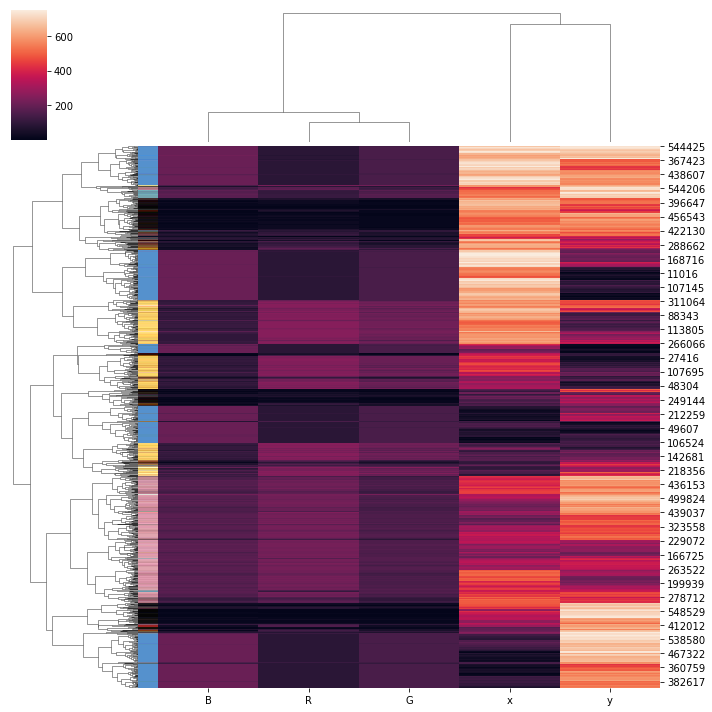

In [144]:
    df_rgb = pd.DataFrame({"R": r, "G": g, "B": b,"x":listx,"y":listy}).sample(n=1000)
    df_rgbtest= df_rgb.drop(columns=['x','y'], axis=1)
    testt= df_rgbtest.to_numpy()
    custom_colors = sns.color_palette(testt / 255.0)
    sns.clustermap(df_rgb, annot=False, row_colors=custom_colors)#sample of 1000

Text(0.5, 0.98, 'Blue')

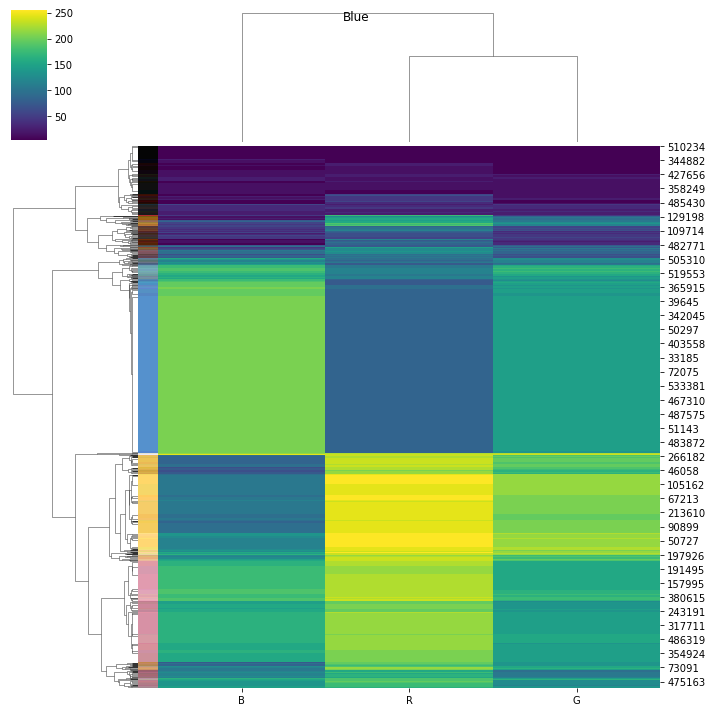

In [160]:
import random

random.seed(0)
df_rgb2 = pd.DataFrame({"R": r, "G": g, "B": b,"x":listx,"y":listy}).sample(n=1000)
df_rgbtest= df_rgb2.drop(columns=['x','y'], axis=1)
testt= df_rgbtest.to_numpy()
custom_colors = sns.color_palette(testt / 255.0)
clust= sns.clustermap(df_rgbtest,  row_colors=custom_colors, cmap='viridis').fig.suptitle('Blue')#sample of 100
clust

In [146]:
import scipy.cluster.hierarchy as sch
d = sch.distance.pdist(df_rgbtest)
L = sch.linkage(d, method='complete')
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, 0.2*d.max(), 'distance')

# clusters indicices correspond to incides of original df
turqindex=[]
for i,cluster in enumerate(clusters):
    if (cluster==14):
        #print(df_rgbtest.index[i], cluster)
        turqindex.append(df_rgbtest.index[i])
turqindex

[418270]

In [147]:
#np.unique(turqindex)
dfturq=df_rgb2.loc[turqindex]

ValueError: The number of observations cannot be determined on an empty distance matrix.

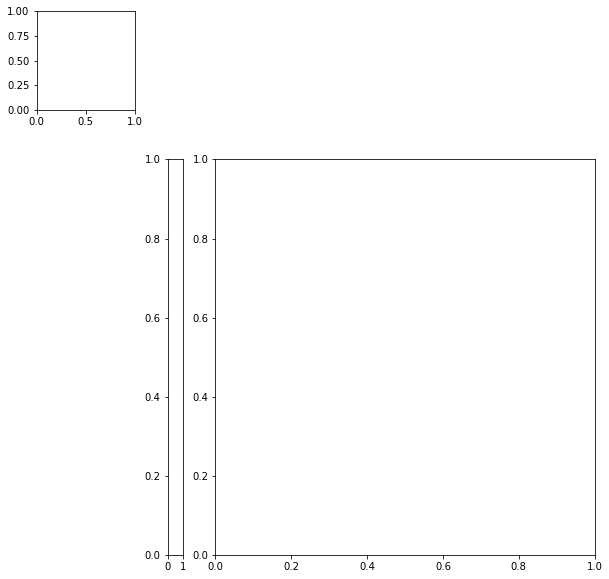

In [148]:
dfturq2 =dfturq.drop(columns=['x','y'], axis=1)
testt= dfturq2.to_numpy()
custom_colors = sns.color_palette(testt / 255.0)
dfnani =dfturq.drop(columns=['R','G','B'], axis=1)
sns.clustermap(dfnani,  row_colors=custom_colors, cmap='viridis')#18227

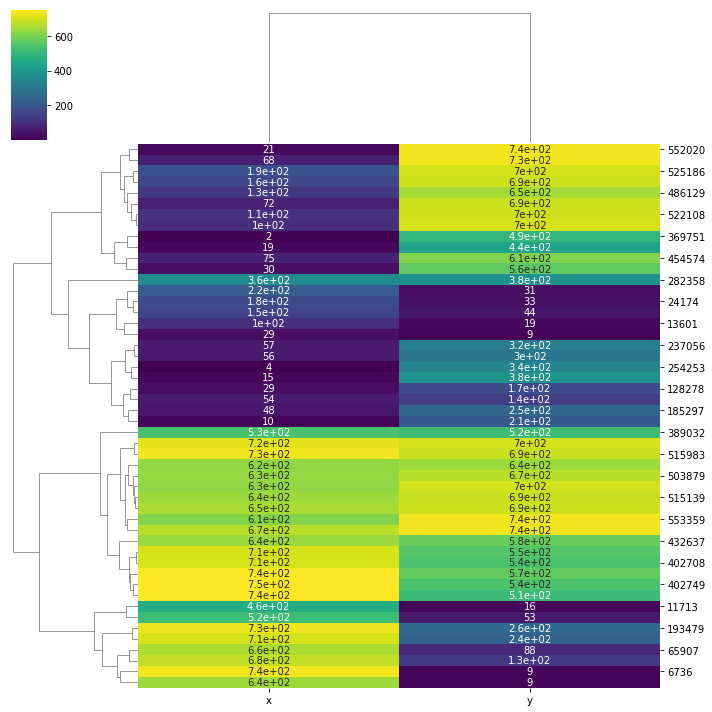

In [ ]:
sns.clustermap(dfnani.sample(n=50),annot=True, cmap='viridis')#18227dfnani.sample(n=100)

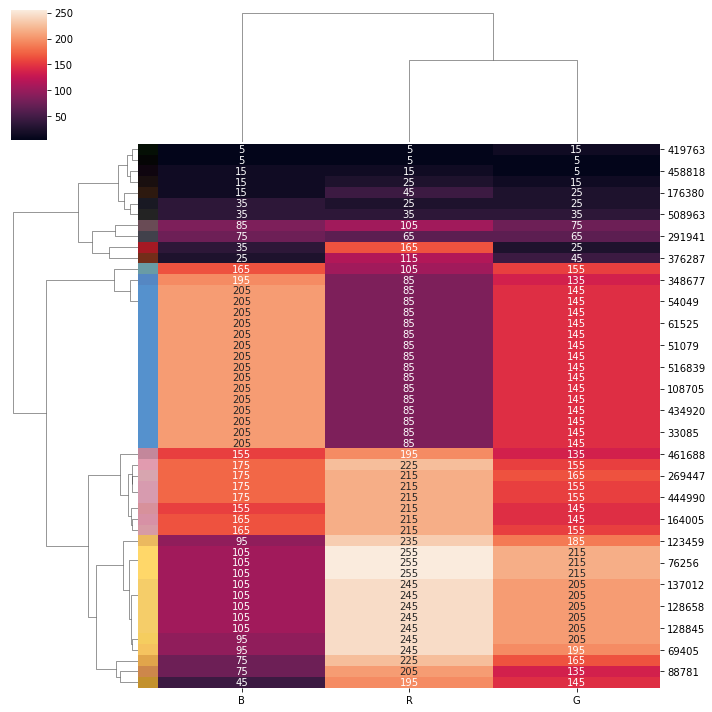

In [ ]:
from matplotlib.colors import ListedColormap
df_rgb3 = pd.DataFrame({"R": r, "G": g, "B": b}).sample(n=50)#sample of 50
testt= df_rgb3.to_numpy()
custom_colors = sns.color_palette(testt / 255.0)
#labels = [format_label(rgb) for rgb in testt]
sns.clustermap(df_rgb3,annot=True,  row_colors=custom_colors,fmt=".3g")
#custom_cmap

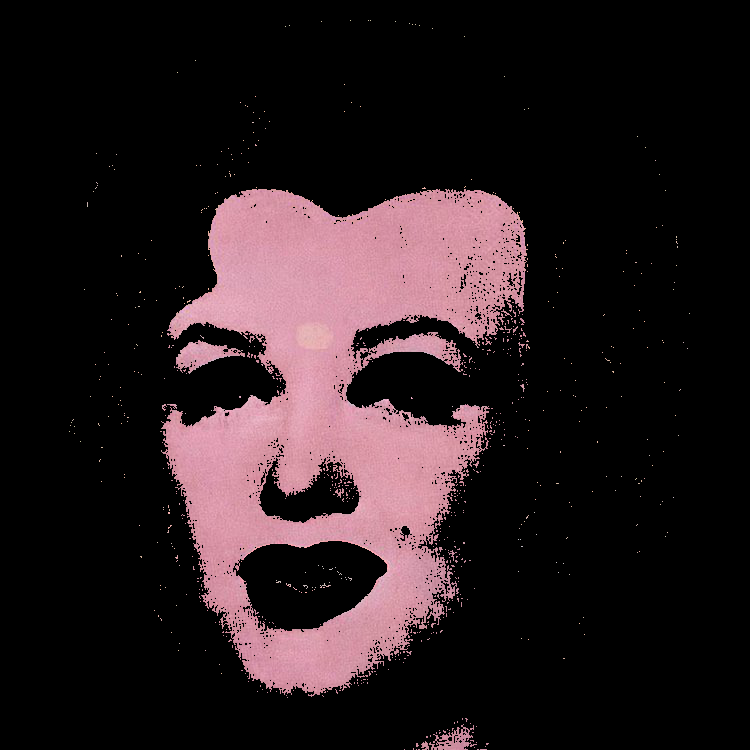

In [ ]:
#220, 160, 180 ish is pink (skin)(bottom cluster)
#220, 220, 5 is yellow(hair) middle cluster
#120, 200,180 is turquoise(earring/eyeshadow) (middle bottom ish cluster)

df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo}) # orig values
df_rgb_copy=df_rgb_og
df_rgb_test = df_rgb_copy[df_rgb_copy['R'].between(190,256)] #select red
df_rgb_test =df_rgb_test[df_rgb_test['B'].between(150,225)] #select blue
df_rgb_test =df_rgb_test[df_rgb_test['G'].between(120,190)] #select green

#df_rgb_testlol  = df_rgb_test[(df_rgb_test ['R']>190) & (df_rgb_test ['R']<255) 
 #                              & (df_rgb_test ['B']>130) & (df_rgb_test ['B']<140)
 #                              & (df_rgb_test ['G']>120) & (df_rgb_test ['G']<255)]
#gg = pd.merge(df_rgb_test,df_rgb_testlol, indicator=True, how='outer').set_axis(df_rgb_test.index).query('_merge=="left_only"').drop('_merge', axis=1)

face=df_rgb_test.index 
notface = ~df_rgb_copy.index.isin(face)
df_rgb_copy.loc[notface,'R']=0
df_rgb_copy.loc[notface,'G']=0
df_rgb_copy.loc[notface,'B']=0
width = 750
height = 750
reshaped_df = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')

Image.fromarray(reshaped_df.astype(np.uint8))

In [ ]:
test=df_rgb_copy.loc[face]

[(120.0, 230.0), (120.0, 230.0)]

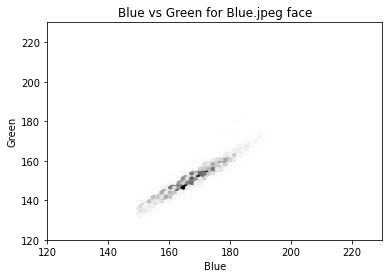

In [ ]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test['B'], test['G'],gridsize=50, cmap='Greys')
ax0.set_title("Blue vs Green for Blue.jpeg face")
plt.xlabel("Blue")
plt.ylabel("Green")
ax0.set(xlim=(120,230), ylim=(120,230))

[(150.0, 255.0), (120.0, 230.0)]

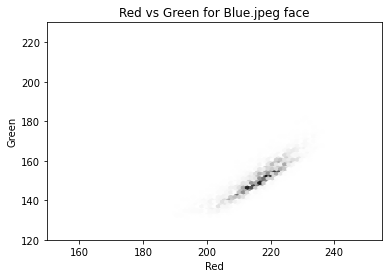

In [ ]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test['R'], test['G'],gridsize=50, cmap='Greys')
ax0.set_title("Red vs Green for Blue.jpeg face")
plt.xlabel("Red")
plt.ylabel("Green")
ax0.set(xlim=(150,255), ylim=(120,230))

[(150.0, 255.0), (120.0, 230.0)]

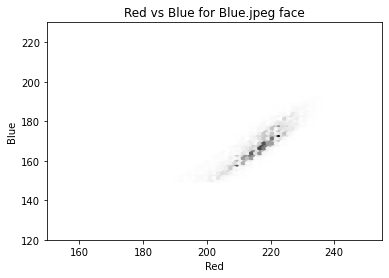

In [ ]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test['R'], test['B'],gridsize=50, cmap='Greys')
ax0.set_title("Red vs Blue for Blue.jpeg face")
plt.xlabel("Red")
plt.ylabel("Blue")
ax0.set(xlim=(150,255), ylim=(120,230))

In [ ]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo})
df_rgb_copy=df_rgb_og
df_rgb_hair = df_rgb_copy[df_rgb_copy['R'].between(140,256)]
df_rgb_hair =df_rgb_hair[df_rgb_hair['B'].between(0,80)]
df_rgb_hair =df_rgb_hair[df_rgb_hair['G'].between(120,256)]
hair=df_rgb_hair.index 
nothair = ~df_rgb_copy.index.isin(hair)
df_rgb_copy.loc[nothair,'R']=0#160
df_rgb_copy.loc[nothair,'G']=0#32
df_rgb_copy.loc[nothair,'B']=0#240
width = 750
height = 750
hairdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')


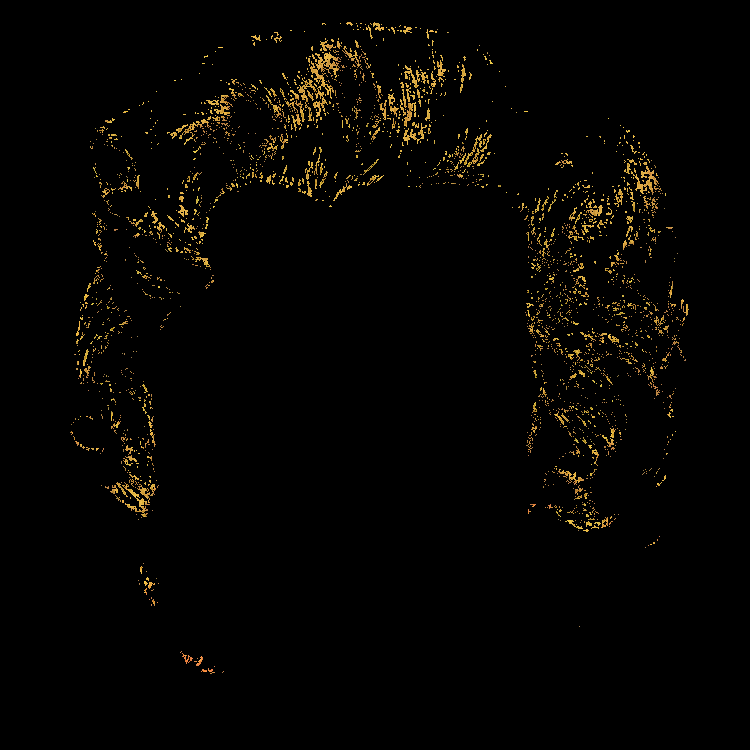

In [ ]:
Image.fromarray(hairdf.astype(np.uint8))

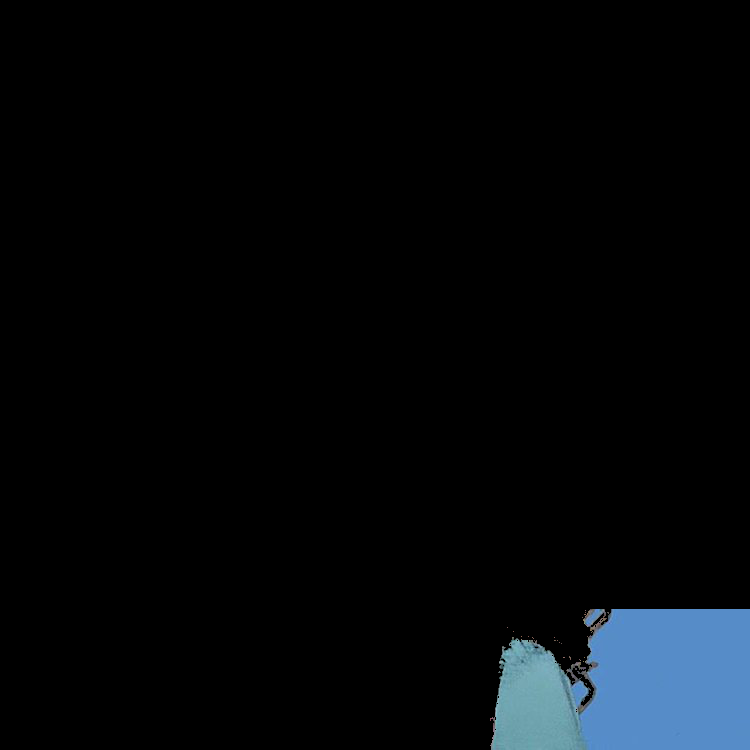

In [ ]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_turq = df_rgb_copy[df_rgb_copy['R'].between(0,145)]
df_rgb_turq =df_rgb_turq[df_rgb_turq['B'].between(75,256)]
df_rgb_turq =df_rgb_turq[df_rgb_turq['G'].between(75,256)]
df_rgb_turq= df_rgb_turq[df_rgb_turq['y'].between(610,750)]
df_rgb_turq= df_rgb_turq[df_rgb_turq['x'].between(491,750)]
turq=df_rgb_turq.index 
notturq = ~df_rgb_copy.index.isin(turq)
df_rgb_copy.loc[notturq,'R']=0#160
df_rgb_copy.loc[notturq,'G']=0#32
df_rgb_copy.loc[notturq,'B']=0#240
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
df_rgb_copy
turqdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(turqdf.astype(np.uint8))

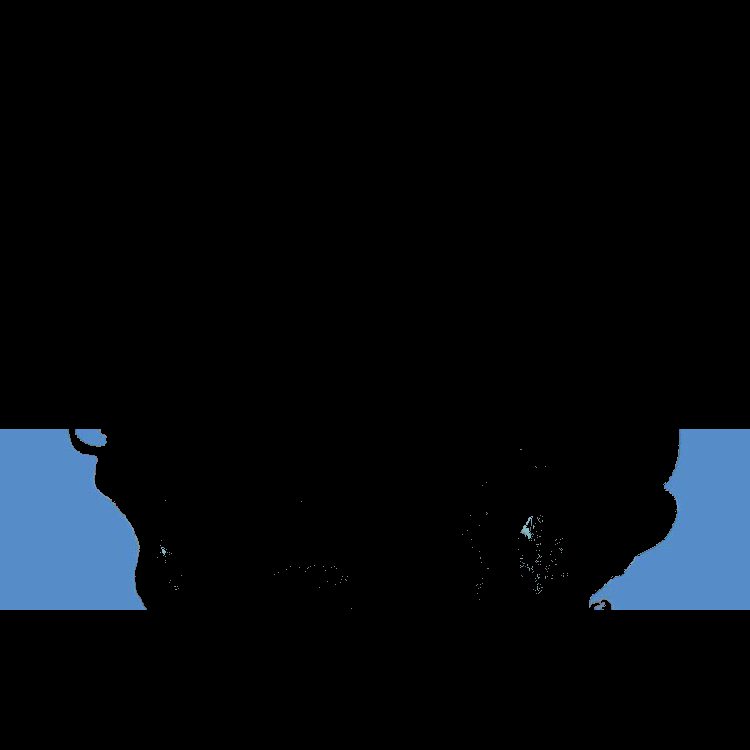

In [ ]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_turq = df_rgb_copy[df_rgb_copy['R'].between(50,145)]
df_rgb_turq =df_rgb_turq[df_rgb_turq['B'].between(125,255)]#135
df_rgb_turq =df_rgb_turq[df_rgb_turq['G'].between(0,255)]
df_rgb_turq= df_rgb_turq[df_rgb_turq['y'].between(430,610)]
turq=df_rgb_turq.index 
notturq = ~df_rgb_copy.index.isin(turq)
df_rgb_copy.loc[notturq,'R']=0#160
df_rgb_copy.loc[notturq,'G']=0#32
df_rgb_copy.loc[notturq,'B']=0#240
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
df_rgb_copy
turqdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(turqdf.astype(np.uint8))

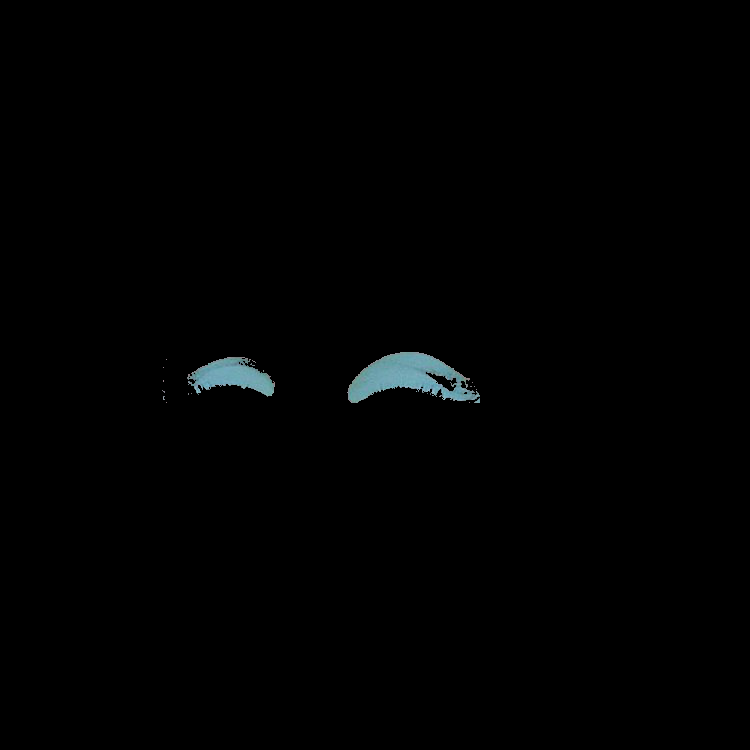

In [ ]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_turq = df_rgb_copy[df_rgb_copy['R'].between(0,150)]
df_rgb_turq =df_rgb_turq[df_rgb_turq['B'].between(120,255)]
df_rgb_turq =df_rgb_turq[df_rgb_turq['G'].between(120,255)]
df_rgb_turq= df_rgb_turq[df_rgb_turq['x'].between(140,480)]
df_rgb_turq= df_rgb_turq[df_rgb_turq['y'].between(350,403)]

#df_rgb_turq = df_rgb_copy[df_rgb_copy['R'].between(150,255)]
#df_rgb_turq =df_rgb_turq[df_rgb_turq['B'].between(130,180)]
#df_rgb_turq =df_rgb_turq[df_rgb_turq['G'].between(120,180)]
#df_rgb_turq= df_rgb_turq[df_rgb_turq['x'].between(140,480)]
#df_rgb_turq= df_rgb_turq[df_rgb_turq['y'].between(350,403)]

df_rgb_turq2  = df_rgb_turq[(df_rgb_turq ['R']>150) & (df_rgb_turq ['R']<255) 
                               & (df_rgb_turq ['B']>120) & (df_rgb_turq ['B']<190)
                               & (df_rgb_turq ['G']>120) & (df_rgb_turq ['G']<190)]
gg = pd.merge(df_rgb_turq,df_rgb_turq2, indicator=True, how='outer').set_axis(df_rgb_turq.index).query('_merge=="left_only"').drop('_merge', axis=1)

turq=gg.index 
notturq = ~df_rgb_copy.index.isin(turq)
df_rgb_copy.loc[notturq,'R']=0#160
df_rgb_copy.loc[notturq,'G']=0#32
df_rgb_copy.loc[notturq,'B']=0#240
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
df_rgb_copy
turqdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(turqdf.astype(np.uint8))

In [ ]:
test2=df_rgb_copy.loc[turq]

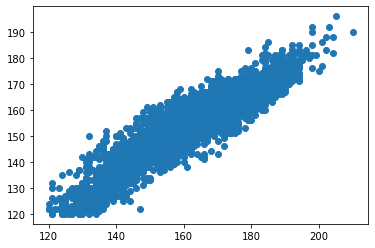

In [ ]:
plt.scatter(test2['B'], test2['G'])

[(140.0, 255.0), (100.0, 250.0)]

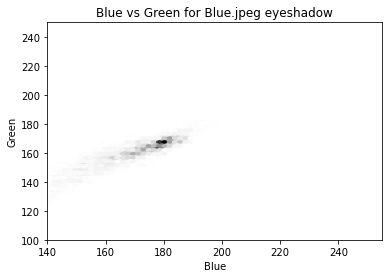

In [ ]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test2['B'], test2['G'],gridsize=50, cmap='Greys')
ax0.set_title("Blue vs Green for Blue.jpeg eyeshadow")
plt.xlabel("Blue")
plt.ylabel("Green")
ax0.set(xlim=(140,255), ylim=(100,250))

[(80.0, 240.0), (100.0, 255.0)]

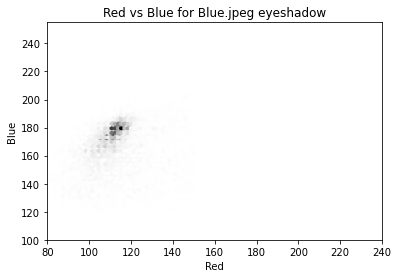

In [ ]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test2['R'], test2['B'],gridsize=50, cmap='Greys')
ax0.set_title("Red vs Blue for Blue.jpeg eyeshadow")
plt.xlabel("Red")
plt.ylabel("Blue")
ax0.set(xlim=(80,240), ylim=(100,255))

[(80.0, 250.0), (100.0, 250.0)]

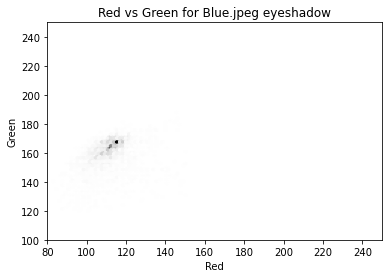

In [ ]:
fig, (ax0) = plt.subplots(ncols=1)
hb = ax0.hexbin(test2['R'], test2['G'],gridsize=50, cmap='Greys')
ax0.set_title("Red vs Green for Blue.jpeg eyeshadow")
plt.xlabel("Red")
plt.ylabel("Green")
ax0.set(xlim=(80,250), ylim=(100,250))

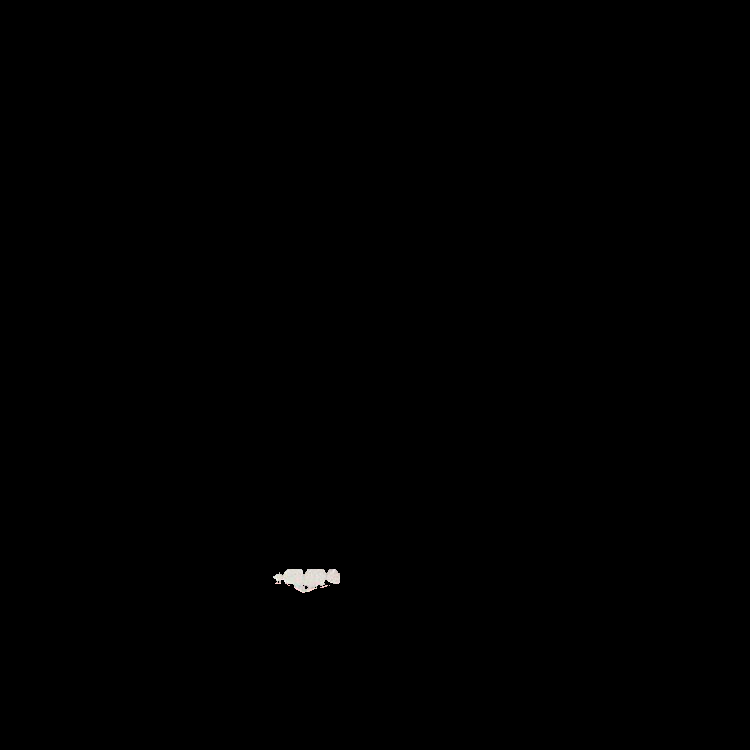

In [ ]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_lips = df_rgb_copy[df_rgb_copy['R'].between(180,256)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['B'].between(180,256)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['G'].between(180,256)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['x'].between(240,340)]
df_rgb_lips= df_rgb_lips[df_rgb_lips['y'].between(570,600)]
lips=df_rgb_lips.index 
notlips = ~df_rgb_copy.index.isin(lips)
df_rgb_copy.loc[notlips,'R']=0#160
df_rgb_copy.loc[notlips,'G']=0#32
df_rgb_copy.loc[notlips,'B']=0#240
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
lipsdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(lipsdf.astype(np.uint8))

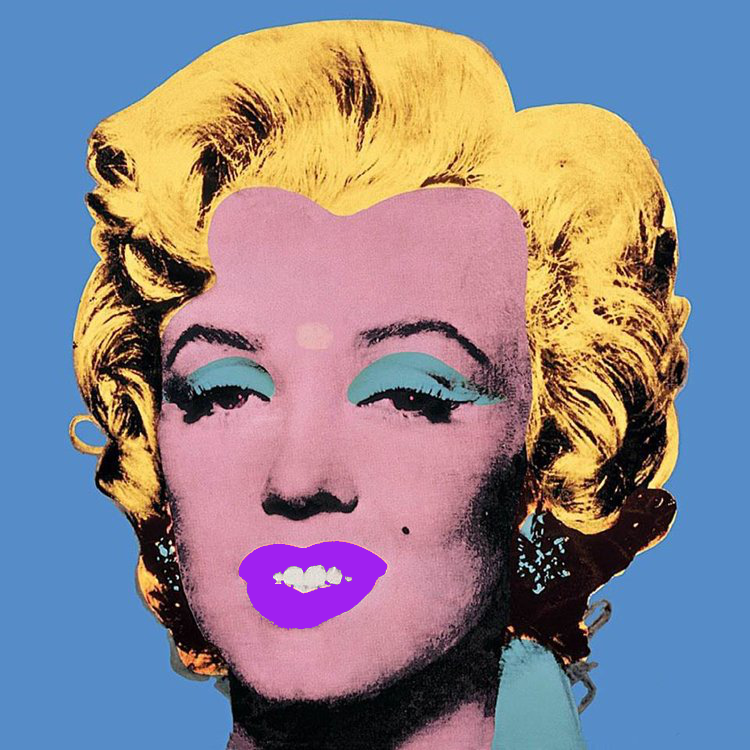

In [ ]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_lips = df_rgb_copy[df_rgb_copy['R'].between(0,256)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['B'].between(0,120)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['G'].between(0,120)]
df_rgb_lips =df_rgb_lips[df_rgb_lips['x'].between(240,400)]
df_rgb_lips= df_rgb_lips[df_rgb_lips['y'].between(540,650)]
lips=df_rgb_lips.index 
notlips = ~df_rgb_copy.index.isin(lips)
df_rgb_copy.loc[lips,'R']=160
df_rgb_copy.loc[lips,'G']=32
df_rgb_copy.loc[lips,'B']=240
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
lipsdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(lipsdf.astype(np.uint8))

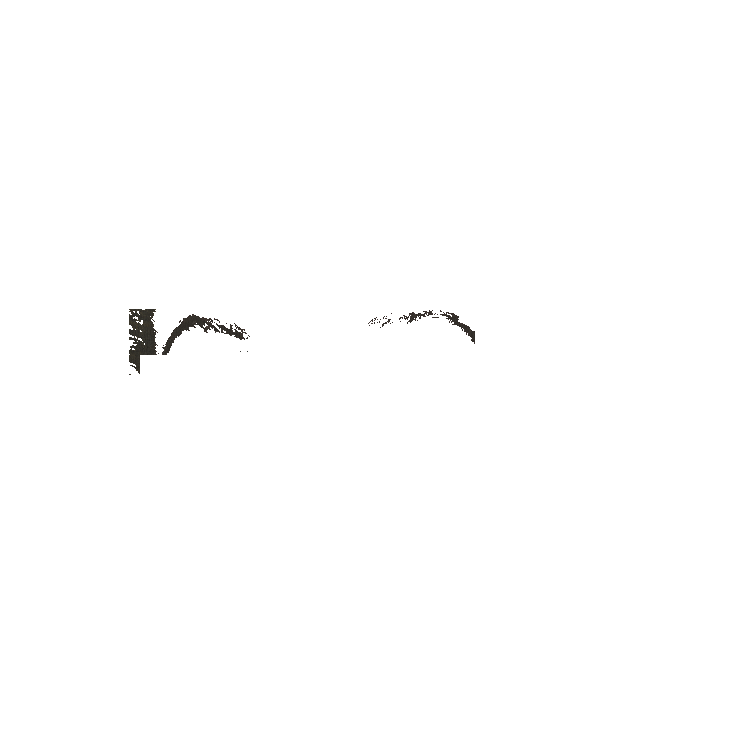

In [ ]:
df_rgb_og = pd.DataFrame({"R": ro, "G": go, "B": bo,"x":listx,"y":listy})
df_rgb_copy=df_rgb_og
df_rgb_eyebrow = df_rgb_copy[df_rgb_copy['R'].between(0,70)]
df_rgb_eyebrow  =df_rgb_eyebrow [df_rgb_eyebrow ['B'].between(0,70)]
df_rgb_eyebrow  =df_rgb_eyebrow [df_rgb_eyebrow ['G'].between(0,70)]
df_rgb_eyebrow  =df_rgb_eyebrow [df_rgb_eyebrow ['x'].between(130,475)]
df_rgb_eyebrow = df_rgb_eyebrow [df_rgb_eyebrow ['y'].between(310,375)]
df_rgb_eyebrow2  = df_rgb_eyebrow[(df_rgb_eyebrow ['x']>140) & (df_rgb_eyebrow ['x']<500) 
                                 & (df_rgb_eyebrow ['y']>355) & (df_rgb_eyebrow ['y']<380)]
gg = pd.merge(df_rgb_eyebrow,df_rgb_eyebrow2, indicator=True, how='outer').set_axis(df_rgb_eyebrow.index).query('_merge=="left_only"').drop('_merge', axis=1)
eyebrow =gg.index 
noteyebrow  = ~df_rgb_copy.index.isin(eyebrow)
df_rgb_copy.loc[noteyebrow,'R']=255
df_rgb_copy.loc[noteyebrow,'G']=255
df_rgb_copy.loc[noteyebrow,'B']=255
df_rgb_copy=df_rgb_copy.drop(columns=['x','y'], axis=1)
width = 750
height = 750
lipsdf = df_rgb_copy.to_numpy().reshape(height, width, 3).astype('uint8')
Image.fromarray(lipsdf.astype(np.uint8))